# <span style="color:red">  Loading in Data  </span>

<font size = "3">

Here, we load in the .pickle file we created in the main notebook, and do all our plotting

In [1]:
import pickle 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [2]:
# load in the file
# "rb" means "read" + "binary"

# filename = "data_raw/plot_data.pickle"
filename = "data_raw/plot_data.peter"

with open(filename, 'rb') as file:
    loaded_data = pickle.load(file)

print(type(loaded_data))
print(loaded_data.keys())

<class 'dict'>
dict_keys(['spending_millions', 'spending_billions', 'combined_spending'])


In [4]:
# Extract objects from the dictionary

df_millions = loaded_data["spending_millions"]
df_billions = loaded_data["spending_billions"]
combined_5 = loaded_data['combined_spending']

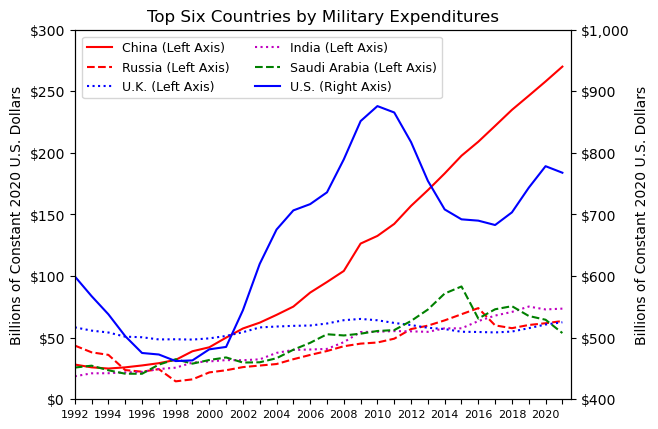

In [5]:

df_plot = df_billions.reset_index()

# copy and paste code creating the figure from the last notebook

# create matplotlib.Figure object 
# and matplotlib.Axes object
fig, ax1 = plt.subplots()

# create a "twin" that shares the x-axis
ax2 = ax1.twinx()

# start off by plotting the "China" curve
ax1.plot("year", "China", data=df_plot, color = "r")
ax1.plot("year", "Russia", data=df_plot, color = 'r', linestyle = '--' )
ax1.plot("year", "U.K.", data=df_plot, color = 'b', linestyle = ':' )
ax1.plot("year", "India", data=df_plot, color = 'm', linestyle = ':')
ax1.plot("year", "Saudi_Arabia", data=df_plot, color='g', linestyle = '--')

ax2.plot("year", "United_States", data=df_plot, color = "b")

# set axis limits
ax1.set_ylim(0, 300)
ax2.set_ylim(400, 1000)
ax1.set_xlim(1992, 2021.5)

# change y-axis ticks
ax1.set_yticks([0, 50, 100, 150, 200, 250, 300])
ax1.set_yticklabels(["$0", "$50", "$100", "$150", "$200", "$250", "$300"])

ax2.set_yticks([400, 500, 600, 700, 800, 900, 1000])
ax2.set_yticklabels(["$400", "$500", "$600", "$700", "$800", "$900", "$1,000"])

# change x-axis ticks
xticks = range(1992, 2022)
xtick_labels = []
for year in range(1992, 2022, 2):
    xtick_labels.append(year)
    xtick_labels.append("")

ax1.set_xticks(xticks)
ax1.set_xticklabels(xtick_labels, fontsize = 8)

plt.title("Top Six Countries by Military Expenditures")

ax1.set_ylabel("Billions of Constant 2020 U.S. Dollars")

ax2.set_ylabel("Billions of Constant 2020 U.S. Dollars")

# create legend

legend_labels = ["China (Left Axis)", "Russia (Left Axis)", "U.K. (Left Axis)", 
    "India (Left Axis)", "Saudi Arabia (Left Axis)", "U.S. (Right Axis)"]

fig.legend(legend_labels, ncol = 2, loc = (0.125, .77), fontsize = 9)

plt.show()

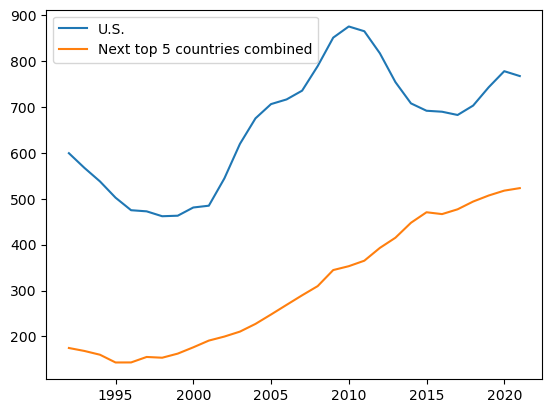

In [6]:
# You can also just use the dictionary directly, instead of creating intermediate variables.

df_plot = loaded_data["spending_billions"].reset_index() # using loaded_data here...

plt.plot("year", "United_States", data = df_plot)
plt.plot(df_plot["year"], loaded_data["combined_spending"]) # ...and here
plt.legend(["U.S.", "Next top 5 countries combined"])
plt.show() 

# <span style="color:red">  Exercise Solutions  </span>

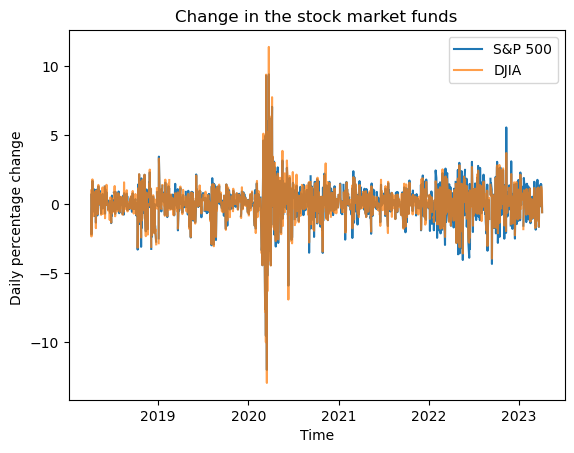

In [9]:
filename = "data_raw/file1.pickle"

with open(filename, 'rb') as file:
    loaded_data = pickle.load(file)

df_financial = loaded_data["financial_df"]

plt.plot("date", "growth_sp500",
          data = df_financial)
plt.plot("date", "growth_djia",
          data = df_financial,alpha = 0.75)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the stock market funds")
plt.legend(["S&P 500", "DJIA"])
plt.show()

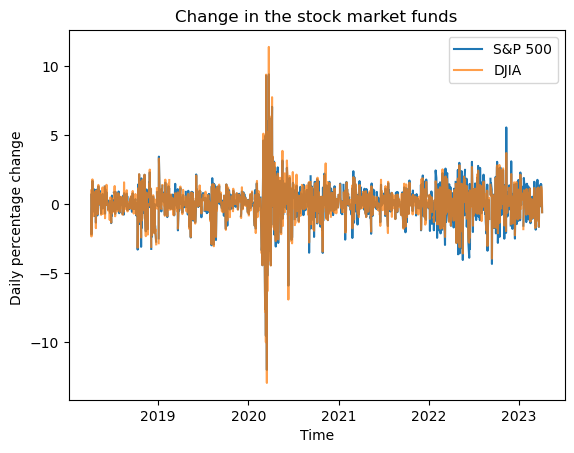

In [11]:
filename = "data_raw/file2.pickle"

with open(filename, 'rb') as file:
    loaded_data = pickle.load(file)

df = loaded_data["financial_df"]
date = loaded_data["date"]
growth_sp500 = loaded_data["sp_growth"]
growth_djia = loaded_data["dj_growth"]

plt.plot(date, growth_sp500)
plt.plot(date, growth_djia, alpha = 0.75)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the stock market funds")
plt.legend(["S&P 500", "DJIA"])
plt.show()